In [72]:
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [73]:
err = 0
def gradient_desc(X,y,lr,num_it):
    m = len(X)
    th0 = np.random.rand()
    th1 = np.random.rand()
    for _ in range(num_it):
        pred = th0+th1*X
        err = pred-y
        cost = (1/2*m)*np.sum(err**2)
        th0 -= lr*(1/m)*np.sum(err)
        th1 -= lr*(1/m)*np.sum(err*X)
    return th0, th1

In [74]:
def pred(X,th0,th1):
    return th0+th1*X

In [75]:
df = pd.read_csv(r"profit.csv")
df

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [76]:
scaler = StandardScaler()
X = scaler.fit_transform(df[["population"]])  # Apply scaling only to the feature

y = df["profit"].values

In [77]:
lr = 0.01
num_it = 1000

In [78]:
th0 , th1 = gradient_desc(X,y,lr,num_it)

In [79]:
X_test = 70000

In [80]:
y_pred = pred(np.array([X_test]).reshape(-1,1),th0,th1)
y_pred = float(y_pred) 

In [81]:
print(f"Tntercept Theta 0:\t{th0:.4f}")
print(f"Intercept Thera 1:\t{th1:.4f}")
print(f"Predicted profit:\t{y_pred:.4f}")

Tntercept Theta 0:	5.8391
Intercept Thera 1:	0.0000
Predicted profit:	5.8391


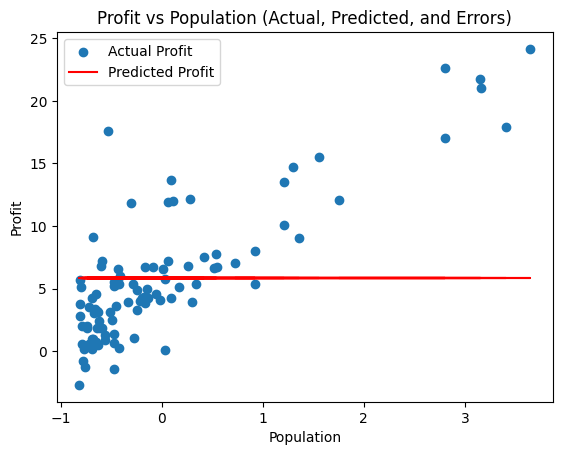

In [82]:
# Plot the actual data points
plt.scatter(X, y, label="Actual Profit")

# Calculate predicted values using the learned parameters
predicted_y = pred(X, th0, th1)

# Plot the predicted line
plt.plot(X, predicted_y, color='red', label="Predicted Profit")


# Add labels and title
plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Profit vs Population (Actual, Predicted, and Errors)")

# Add legend
plt.legend()

# Show the plot
plt.show()